In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
df = pd.read_csv("../data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
def remove_outliers_iqr_all(df):
    numeric_cols = df.select_dtypes(include='number').columns
    mask = pd.Series([True] * len(df), index=df.index)  

    for col in numeric_cols:
        data = df[col].dropna()
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask &= (df[col] >= lower) & (df[col] <= upper)

    return df[mask]  
df = remove_outliers_iqr_all(df)
print("Before cleaning", df.shape)
print("After cleaning", df.shape)

Before cleaning (198, 5)
After cleaning (198, 5)


In [5]:
df.drop("CustomerID" , axis=1 , inplace=True)
df = df.select_dtypes(include=['float64', 'int64'])

In [6]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
193,38,113,91
194,47,120,16
195,35,120,79
196,45,126,28


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

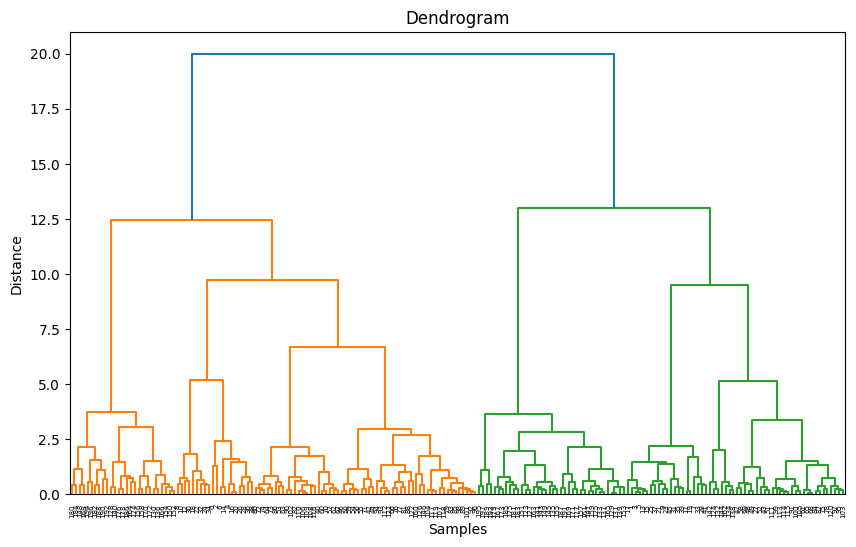

In [8]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [9]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = model.fit_predict(scaled_data)

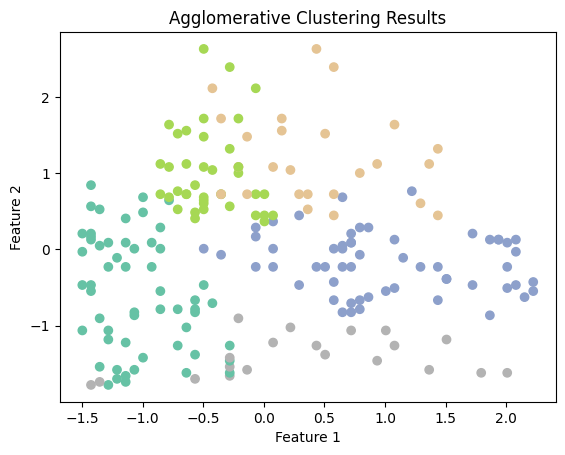

In [10]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='Set2')
plt.title("Agglomerative Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data ,labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4006897229885412
